In [63]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
%matplotlib inline

In [64]:
#Import worldwide Covid vaccination records and check data types
# Data source: https://www.kaggle.com/yamqwe/covid-19-vaccinationse
df = pd.read_csv('vaccinations.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80014 entries, 0 to 80013
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                80014 non-null  int64  
 1   location                             80014 non-null  object 
 2   iso_code                             80014 non-null  object 
 3   date                                 80014 non-null  object 
 4   total_vaccinations                   44200 non-null  float64
 5   people_vaccinated                    42185 non-null  float64
 6   people_fully_vaccinated              39434 non-null  float64
 7   total_boosters                       15521 non-null  float64
 8   daily_vaccinations_raw               36983 non-null  float64
 9   daily_vaccinations                   79677 non-null  float64
 10  total_vaccinations_per_hundred       44200 non-null  float64
 11  people_vaccinated_per_hundre

In [65]:
#inspect the data schema
df.head()
df['date'] = pd.to_datetime(df['date'])

In [66]:
# Select columns for EDA
df1 = df1[['location','iso_code','date','daily_vaccinations','daily_vaccinations_per_million', 'daily_people_vaccinated',
         'daily_people_vaccinated_per_hundred']]

# Check for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 31708 to 64618
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   location                             1111 non-null   object        
 1   iso_code                             1111 non-null   object        
 2   date                                 1111 non-null   datetime64[ns]
 3   daily_vaccinations                   1108 non-null   float64       
 4   daily_vaccinations_per_million       1108 non-null   float64       
 5   daily_people_vaccinated              1050 non-null   float64       
 6   daily_people_vaccinated_per_hundred  1050 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 69.4+ KB


In [67]:
# Filter for Hong Kong, Macao, Singapore
#df1 = df1[df1.location == 'Hong Kong']
df1a = df1.loc[df1['location'].isin(['Hong Kong', 'Macao', 'Singapore'])]
df1a

,location,iso_code,date,daily_vaccinations,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
31708,Hong Kong,HKG,2021-02-22,NaN,NaN,NaN,NaN
31709,Hong Kong,HKG,2021-02-23,532.0,70.0,532.0,0.007
31710,Hong Kong,HKG,2021-02-24,266.0,35.0,266.0,0.004
31711,Hong Kong,HKG,2021-02-25,177.0,23.0,177.0,0.002
31712,Hong Kong,HKG,2021-02-26,1650.0,218.0,1650.0,0.022
...,...,...,...,...,...,...,...
64614,Singapore,SGP,2022-01-26,34223.0,6275.0,5507.0,0.101
64615,Singapore,SGP,2022-01-27,33963.0,6228.0,5454.0,0.100
64616,Singapore,SGP,2022-01-28,33336.0,6113.0,4933.0,0.090
64617,Singapore,SGP,2022-01-29,32403.0,5942.0,4357.0,0.080


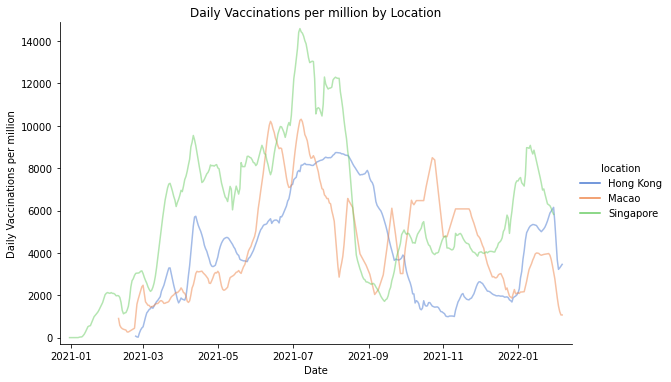

In [68]:
# plot with time
sns.relplot(kind='line', x='date', y='daily_vaccinations_per_million', data=df1a, hue='location', palette='muted', alpha=0.5, 
            height=5, aspect=8/5, legend='auto')
plt.margins(0.02)
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations per million')
plt.title('Daily Vaccinations per million by Location')
plt.savefig("vac.png", bbox_inches = 'tight')
plt.show()


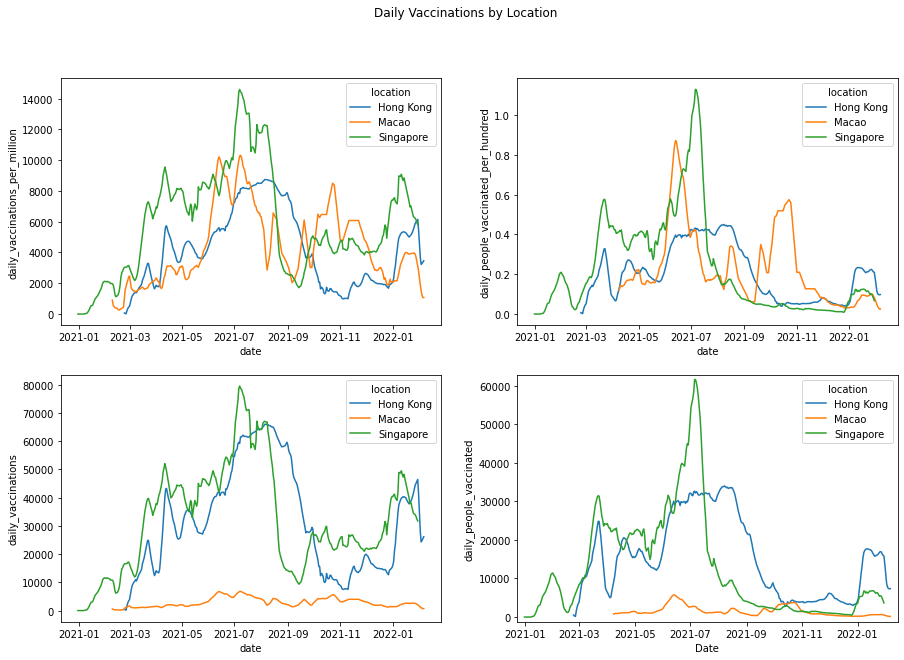

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Daily Vaccinations by Location')


sns.lineplot(ax=axes[0,0], x='date', y='daily_vaccinations_per_million', hue='location', data=df1a)
sns.lineplot(ax=axes[0,1], x='date', y='daily_people_vaccinated_per_hundred', hue='location', data=df1a)
sns.lineplot(ax=axes[1,0], x='date', y='daily_vaccinations', hue='location', data=df1a)
sns.lineplot(ax=axes[1,1], x='date', y='daily_people_vaccinated', hue='location', data=df1a)
 
plt.margins(0.02)
plt.xlabel('Date')
plt.savefig("vac.png", bbox_inches = 'tight')
plt.show()

Out of the three locations, Singapore had earliest vaccine availability at the start of 2021. Macao and Hong Kong vaccines were available in February and March 2021, respectively. As the population in Macao is small, looking at the daily vaccinations chart against the other two locations become distorted, a better representation is the per million or per hundred trends. As time passed, effects of the vaccine became more apparent, government policies changed, seeing an increase in vaccinations around the summer of 2021.

In [70]:
vac_sum = df1a.groupby(by=['location'])[['daily_vaccinations_per_million','daily_people_vaccinated_per_hundred',
                                        'daily_vaccinations', 'daily_people_vaccinated']].sum()
vac_sum.sort_values(by=['daily_people_vaccinated_per_hundred'], ascending=False)

,daily_vaccinations_per_million,daily_people_vaccinated_per_hundred,daily_vaccinations,daily_people_vaccinated
location,,,,
Singapore,2342528.0,90.203,12775195.0,4919336.0
Macao,1585769.0,71.470,1044056.0,470499.0
Hong Kong,1481235.0,71.245,11187419.0,5380514.0


In [71]:
df2 = df.dropna(subset=['total_vaccinations', 'people_vaccinated','people_fully_vaccinated']).drop(['index','total_boosters', 'daily_vaccinations_raw','total_boosters_per_hundred'], axis=1)
df2 = df2[~df2.location.isin(["Africa", "Asia", "Low income", "Lower middle income", "Europe", "European Union", "High income", "North America", "Oceania", "South America", "Upper middle income", "World"])]

df2

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,13921.0,1.27,1.13,0.14,349.0,10994.0,0.028
87,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,4822.0,1.38,1.18,0.19,121.0,2385.0,0.006
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,5692.0,1.44,1.20,0.24,143.0,1883.0,0.005
93,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,6768.0,1.48,1.20,0.28,170.0,1631.0,0.004
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,6487.0,1.49,1.20,0.29,163.0,1319.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,Zimbabwe,ZWE,2022-02-01,7578422.0,4274653.0,3303769.0,7550.0,50.21,28.32,21.89,500.0,3725.0,0.025
80010,Zimbabwe,ZWE,2022-02-02,7593924.0,4282687.0,3311237.0,8608.0,50.32,28.38,21.94,570.0,4290.0,0.028
80011,Zimbabwe,ZWE,2022-02-03,7600946.0,4286198.0,3314748.0,8296.0,50.36,28.40,21.96,550.0,4160.0,0.028
80012,Zimbabwe,ZWE,2022-02-04,7611929.0,4292012.0,3319917.0,8188.0,50.44,28.44,22.00,543.0,4094.0,0.027


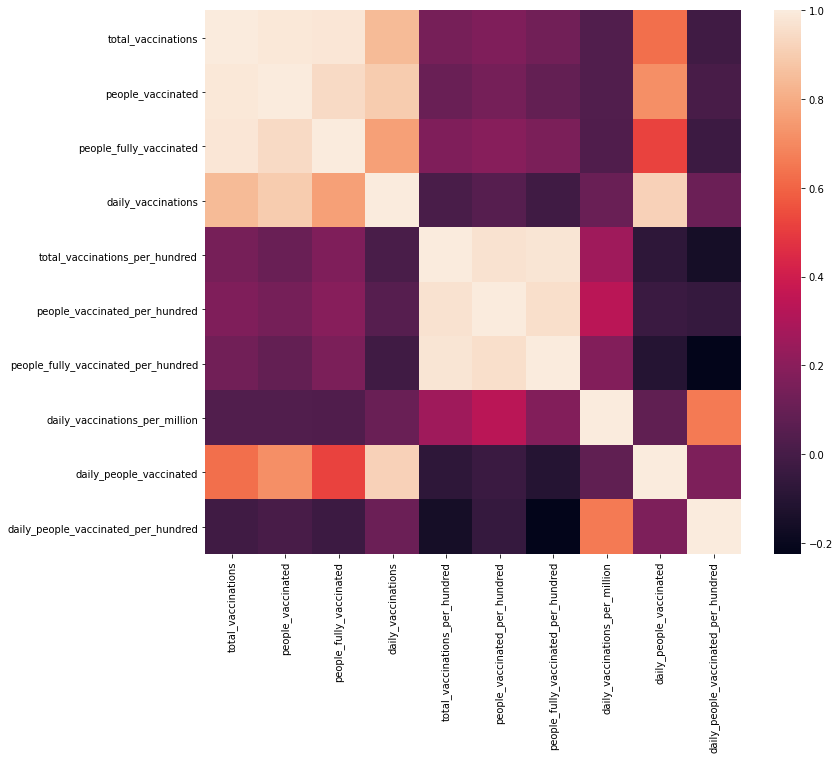

In [72]:
plt.subplots(figsize=(12,10))
sns.heatmap(df2.corr());

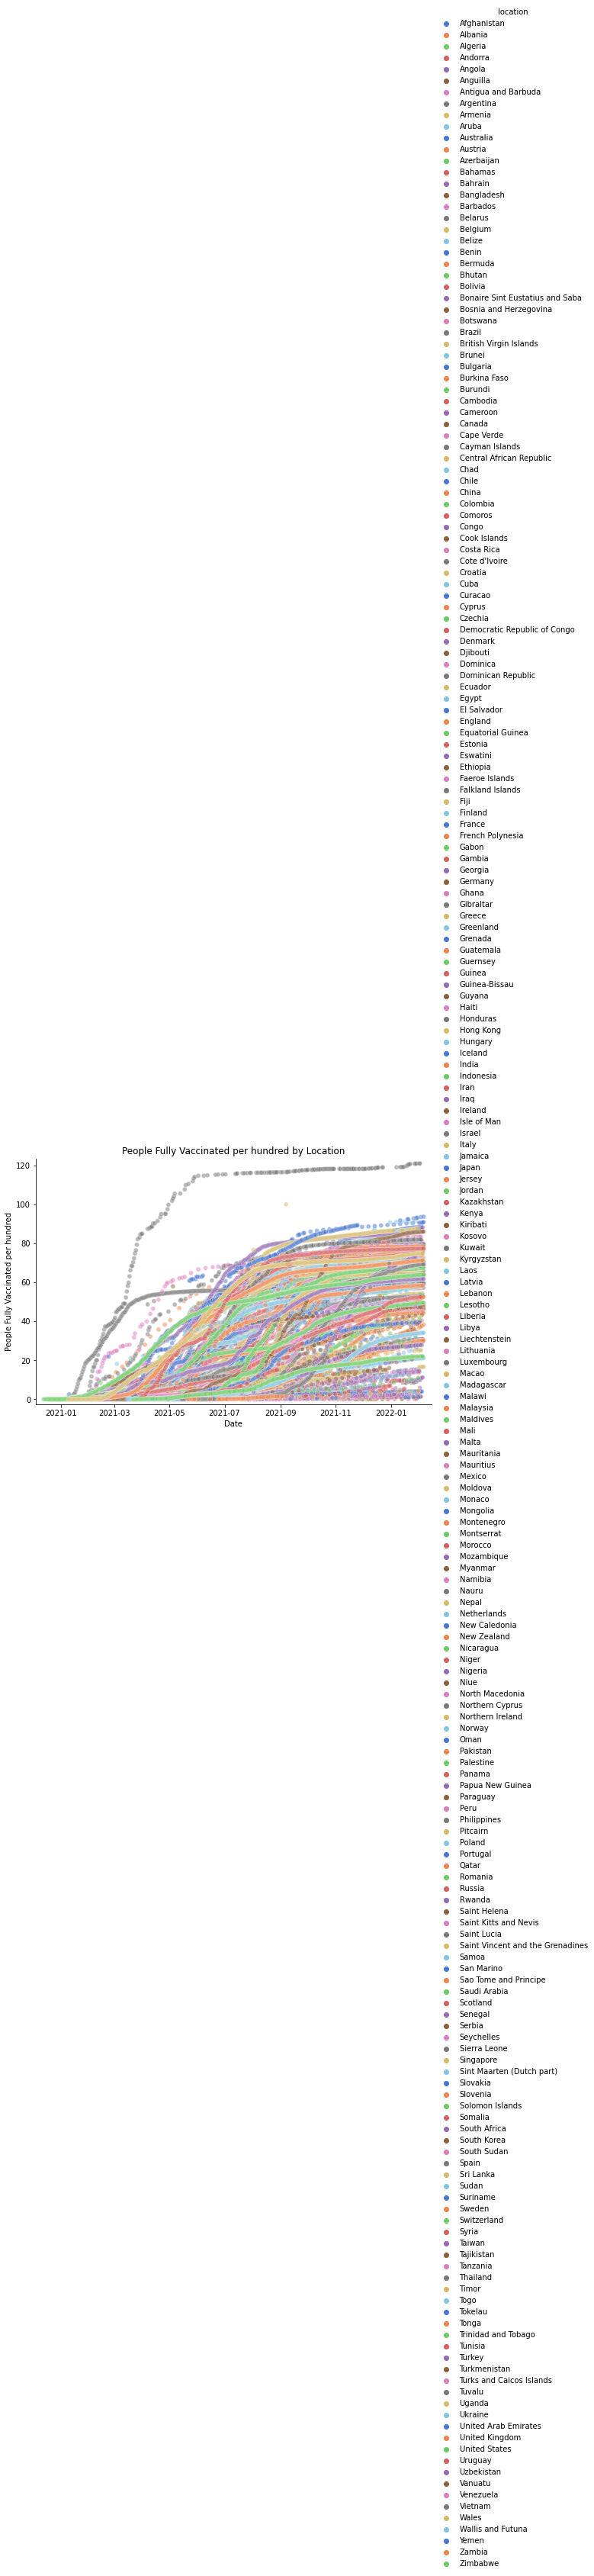

In [73]:
# Relationship between people_fully_vaccinated_per_hundred and date, grouped by location
sns.relplot(x='date', y='people_fully_vaccinated_per_hundred', data=df2, hue='location', palette="muted", alpha=0.5, height=5, aspect=8/5, legend='auto')
plt.margins(0.02)
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated per hundred')
plt.title('People Fully Vaccinated per hundred by Location')
plt.savefig("vac.png", bbox_inches = 'tight')
plt.show()

In [143]:
# Filter without the aggregate locations
df3 = df[~df.location.isin(["Africa", "Asia", "Low income", "Lower middle income", "Europe", "European Union", "High income", "North America", "Oceania", "South America", "Upper middle income", "World"])]

df3 = df3[['location','date','daily_vaccinations_per_million']]

# Check for null values
df3 = df3.dropna(subset=['daily_vaccinations_per_million'])

df3

,location,date,daily_vaccinations_per_million
1,Afghanistan,2021-02-23,34.0
2,Afghanistan,2021-02-24,34.0
3,Afghanistan,2021-02-25,34.0
4,Afghanistan,2021-02-26,34.0
5,Afghanistan,2021-02-27,34.0
...,...,...,...
80009,Zimbabwe,2022-02-01,500.0
80010,Zimbabwe,2022-02-02,570.0
80011,Zimbabwe,2022-02-03,550.0
80012,Zimbabwe,2022-02-04,543.0


In [144]:
df3.date = df3.date - df3.date.min()
df3.date = df3.date.dt.days
df3

,location,date,daily_vaccinations_per_million
1,Afghanistan,83,34.0
2,Afghanistan,84,34.0
3,Afghanistan,85,34.0
4,Afghanistan,86,34.0
5,Afghanistan,87,34.0
...,...,...,...
80009,Zimbabwe,426,500.0
80010,Zimbabwe,427,570.0
80011,Zimbabwe,428,550.0
80012,Zimbabwe,429,543.0


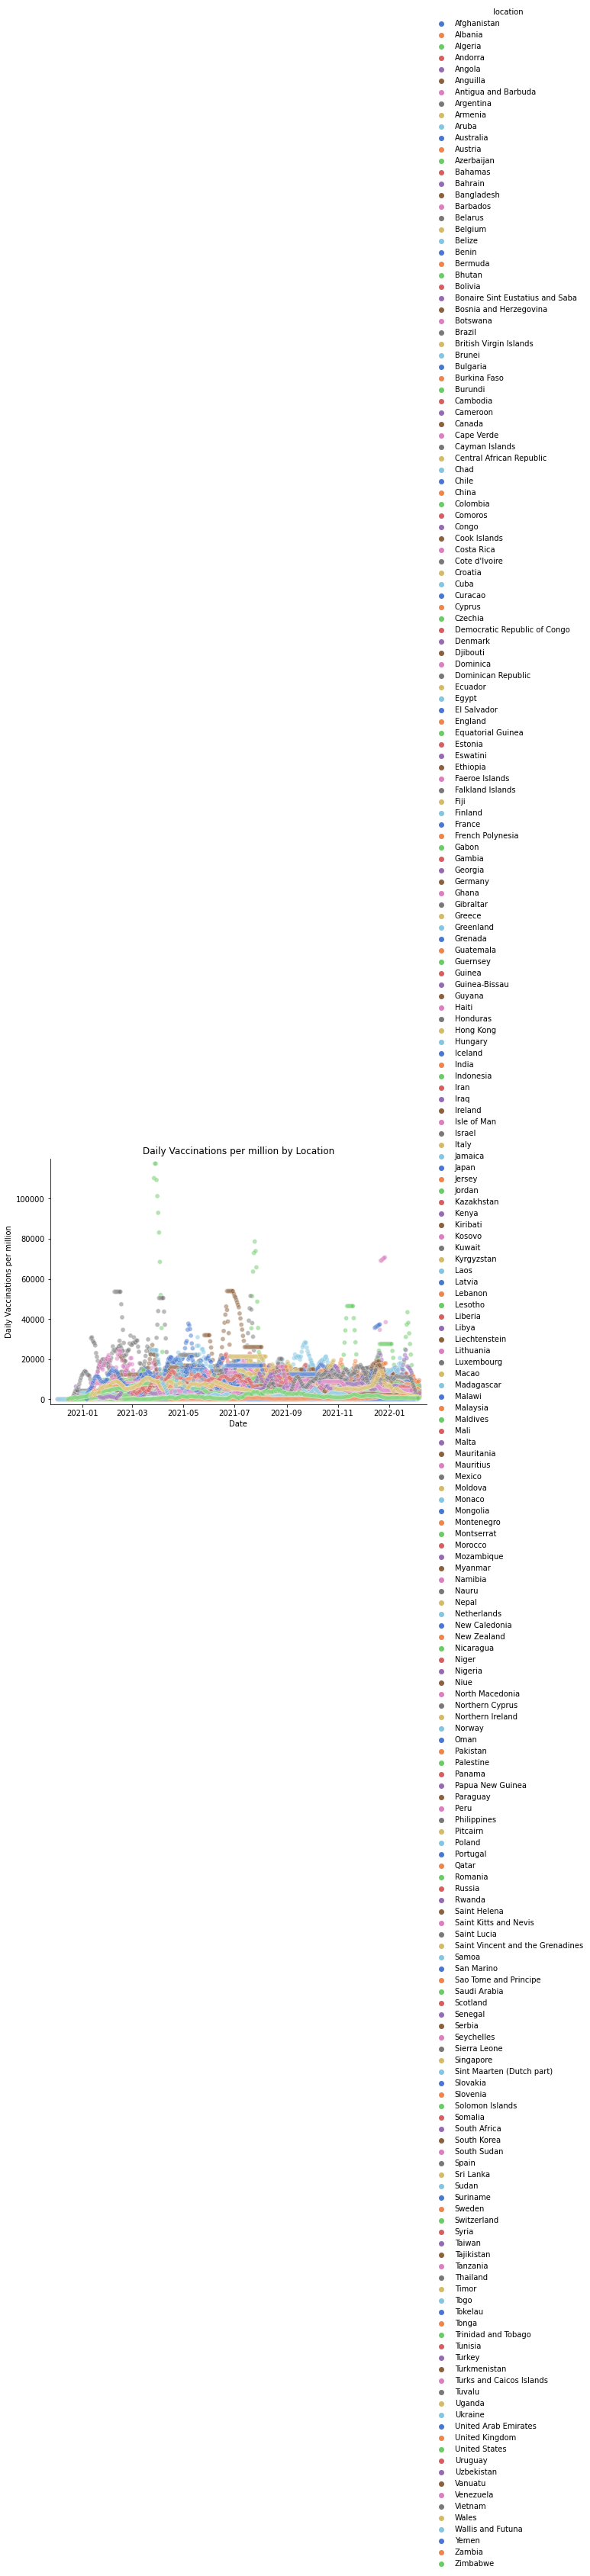

In [75]:
# Relationship between people_fully_vaccinated_per_hundred and date, grouped by location
sns.relplot(x='date', y='daily_vaccinations_per_million', data=df3, hue='location', palette="muted", alpha=0.5, height=5, aspect=8/5, legend='auto')
plt.margins(0.02)
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations per million')
plt.title('Daily Vaccinations per million by Location')
plt.savefig("vac2.png", bbox_inches = 'tight')
plt.show()

In [149]:
# clustering
import sklearn.cluster
import numpy as np

# Make an empty list
ss = []

# Make an empty dictionary called assignments 
assignments = {}

# store df in a variable X 
features = ['location','date','daily_vaccinations_per_million']
X = pd.get_dummies(df3[features])
X = X.to_numpy() 



In [150]:
#pip install tslearn

In [160]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
km = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=5,
                       random_state=0).fit(X)

sz = X.shape[1]

y_pred = km.fit_predict(X)

km.cluster_centers_.shape


(6, 225, 1)

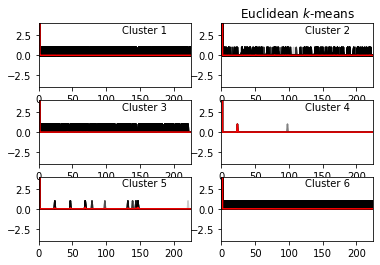

In [161]:
plt.figure()
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    for xx in X[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [162]:
km.labels_

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [163]:
km.get_params()

{'dtw_inertia': False,
 'init': 'k-means++',
 'max_iter': 5,
 'max_iter_barycenter': 100,
 'metric': 'euclidean',
 'metric_params': None,
 'n_clusters': 6,
 'n_init': 1,
 'n_jobs': None,
 'random_state': 0,
 'tol': 1e-06,
 'verbose': 0}